In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/selva86/datasets/master/Sacramento.csv")

## Split Train-Test

In [16]:
# feature variables (X) and the target variable (y)
X = df[['sqft', 'beds', 'baths']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Variables:
- `X_train`: the feature variables for the training set
- `X_test`: the feature variables for the testing set
- `y_train`: the target variable for the training set
- `y_test`: the target variable for the testing set

## Creación de modelo líneal múltiple y evaluación



In [17]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_y_pred)
print(f"Multiple Linear Regression Mean Squared Error: {linear_mse:.2f}")

Multiple Linear Regression Mean Squared Error: 8047393994.98


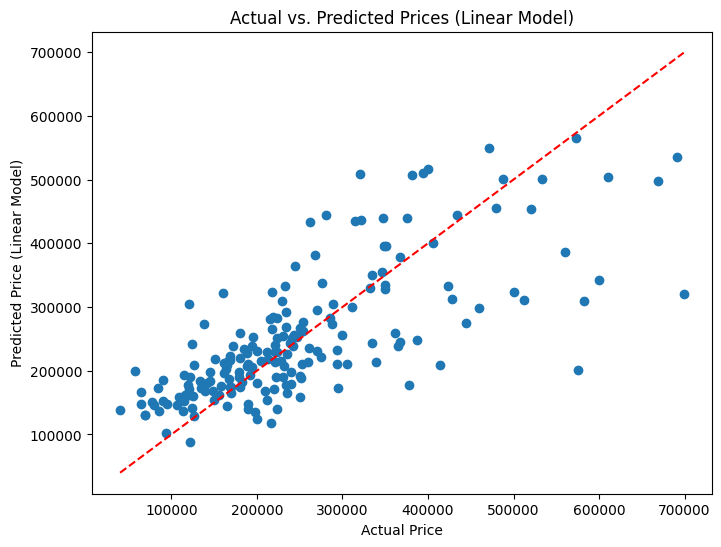

In [23]:
# Scatter plot of actual vs. predicted prices (linear model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, linear_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Linear Model)')
plt.title('Actual vs. Predicted Prices (Linear Model)')
plt.show()

## Creación de modelo polinómico múltiple y evaluación

In [19]:
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)
poly_mse = mean_squared_error(y_test, poly_y_pred)
print(f"Multiple Polynomial Regression Mean Squared Error: {poly_mse:.2f}")

Multiple Polynomial Regression Mean Squared Error: 8004765968.08


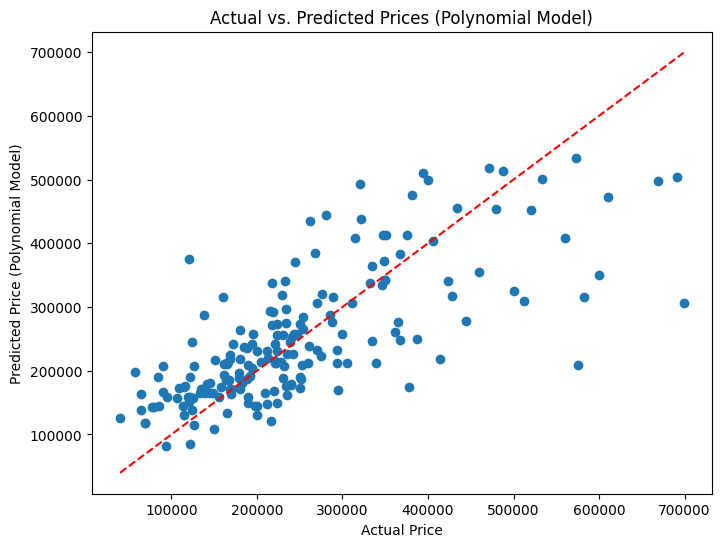

In [20]:
# Scatter plot of actual vs. predicted prices (polynomial model)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, poly_y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price (Polynomial Model)')
plt.title('Actual vs. Predicted Prices (Polynomial Model)')
plt.show()